In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint



In [5]:
#import csvs and format dates to merge the data frames
washington_weather_data = pd.read_csv("WashingtonDataCenter.csv")
washington_weather_data["Date"] = pd.to_datetime(washington_weather_data["Date"]).dt.strftime('%m/%d/%y')

iceland_weather_data = pd.read_csv("ReykjavikIcelandDataCenter.csv")
iceland_weather_data["Date"] = pd.to_datetime(iceland_weather_data["Date"]).dt.strftime('%m/%d/%y')

bitcoin = pd.read_csv("BTC-USD.csv")
bitcoin["Date"] = pd.to_datetime(bitcoin["Date"]).dt.strftime('%m/%d/%y')

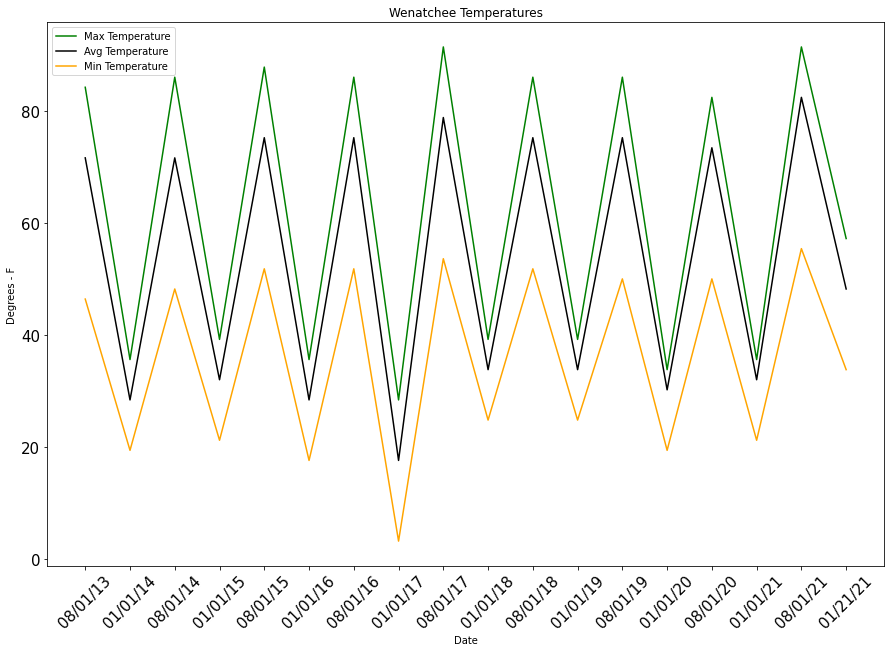

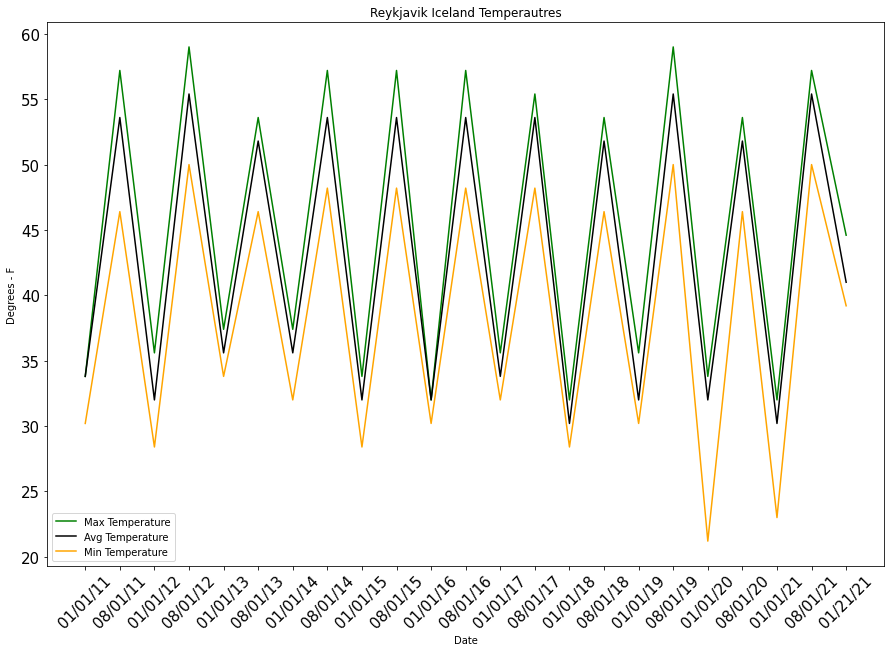

In [16]:
dates = washington_weather_data["Date"]
MaxTemp = washington_weather_data["Max Temp"]
AvgTemp = washington_weather_data["Avg Temp"]
MinTemp = washington_weather_data["Min Temp"]

plt.figure(figsize=(15, 10))

plt.plot(dates, MaxTemp, color="green", label="Max Temperature")
plt.plot(dates, AvgTemp, color="black", label="Avg Temperature")
plt.plot(dates, MinTemp, color="orange", label="Min Temperature")
plt.legend(loc="best")
plt.title("Wenatchee Temperatures")
plt.xticks(rotation=45)
plt.xticks(fontsize=15)
plt.xlabel("Date")
plt.ylabel("Degrees - F")
plt.yticks(fontsize=15)
plt.show()

dates = iceland_weather_data["Date"]
MaxTemp = iceland_weather_data["Max Temp"]
AvgTemp = iceland_weather_data["Avg Temp"]
MinTemp = iceland_weather_data["Min Temp"]

plt.figure(figsize=(15, 10))

plt.plot(dates, MaxTemp, color="green", label="Max Temperature")
plt.plot(dates, AvgTemp, color="black", label="Avg Temperature")
plt.plot(dates, MinTemp, color="orange", label="Min Temperature")
plt.legend(loc="best")
plt.title("Reykjavik Iceland Temperautres")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.xticks(fontsize=15)
plt.ylabel("Degrees - F")
plt.yticks(fontsize=15)
plt.show()

In [3]:
#merging the Washington and Reykjavik data frames and formatting the columns
weather_df = pd.merge(wash_weather_data, ice_weather_data, how="inner", on="Date")
weather_df.rename(columns = {'Max Temp_x':'Max Temp Washington', 'Avg Temp_x':'Avg Temp Washington', 'Min Temp_x':'Min Temp Washington','Max Temp_y':'Max Temp Reykjavik', 'Avg Temp_y':'Avg Temp Reykjavik', 'Min Temp_y':'Min Temp Reykjavik'}, inplace = True)

#merging the weather dataframe with the bitcoin dataframe
bit_weather_df = pd.merge(weather_df, bitcoin, how="inner", on="Date")
bit_weather_df

,Date,Max Temp Washington,Avg Temp Washington,Min Temp Washington,Max Temp Reykjavik,Avg Temp Reykjavik,Min Temp Reykjavik,Open,High,Low,Close,Adj Close,Volume
0,01/01/17,28.4,17.6,3.2,35.6,33.8,32.0,963.658020,1003.080017,958.698975,998.325012,998.325012,1.477750e+08
1,08/01/17,91.4,78.8,53.6,55.4,53.6,48.2,2871.300049,2921.350098,2685.610107,2718.260010,2718.260010,1.324670e+09
2,01/01/18,39.2,33.8,24.8,32.0,30.2,28.4,14112.200200,14112.200200,13154.700200,13657.200200,13657.200200,1.029120e+10
3,08/01/18,86.0,75.2,51.8,53.6,51.8,46.4,7769.040039,7769.040039,7504.950195,7624.910156,7624.910156,4.797620e+09
4,01/01/19,39.2,33.8,24.8,35.6,32.0,30.2,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09
5,08/01/19,86.0,75.2,50.0,59.0,55.4,50.0,10077.442380,10446.919920,9922.019531,10399.668950,10399.668950,1.716534e+10
6,01/01/20,33.8,30.2,19.4,33.8,32.0,21.2,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10
7,08/01/20,82.4,73.4,50.0,53.6,51.8,46.4,11322.570310,11794.775390,11239.682620,11759.592770,11759.592770,2.607567e+10
8,01/01/21,35.6,32.0,21.2,32.0,30.2,23.0,28994.009770,29600.626950,28803.585940,29374.152340,29374.152340,4.073030e+10
9,08/01/21,91.4,82.4,55.4,57.2,55.4,50.0,41460.843750,42541.679690,39540.941410,39974.894530,39974.894530,2.668844e+10


In [7]:
#could try pulling out month - maybe before merging the DFs?
#bit_weather_df["Month"] = bit_weather_df["Date"].dt.Month

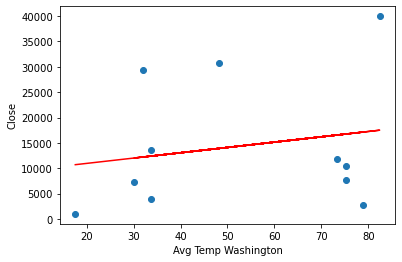

The correlation between both factors is 0.2


In [13]:
x_values = bit_weather_df['Avg Temp Washington']
y_values = bit_weather_df['Close']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=10,color="red")
plt.xlabel('Avg Temp Washington')
plt.ylabel('Close')

plt.show()

correlation = st.pearsonr(bit_weather_df['Avg Temp Washington'],bit_weather_df['Close'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [14]:
#put January into one df and Aug into another
#for loop by month and append to df
#create new column for month/season
jan_data = bit_weather_df.loc[(bit_weather_df["Date"]== "01/01/17") | 
                              (bit_weather_df["Date"]== "01/01/18") | 
                              (bit_weather_df["Date"]== "01/01/19") | 
                              (bit_weather_df["Date"]== "01/01/20") | 
                              (bit_weather_df["Date"]== "01/01/21")]
jan_data

,Date,Max Temp Washington,Avg Temp Washington,Min Temp Washington,Max Temp Reykjavik,Avg Temp Reykjavik,Min Temp Reykjavik,Open,High,Low,Close,Adj Close,Volume
0,01/01/17,28.4,17.6,3.2,35.6,33.8,32.0,963.658020,1003.080017,958.698975,998.325012,998.325012,1.477750e+08
2,01/01/18,39.2,33.8,24.8,32.0,30.2,28.4,14112.200200,14112.200200,13154.700200,13657.200200,13657.200200,1.029120e+10
4,01/01/19,39.2,33.8,24.8,35.6,32.0,30.2,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09
6,01/01/20,33.8,30.2,19.4,33.8,32.0,21.2,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10
8,01/01/21,35.6,32.0,21.2,32.0,30.2,23.0,28994.009770,29600.626950,28803.585940,29374.152340,29374.152340,4.073030e+10


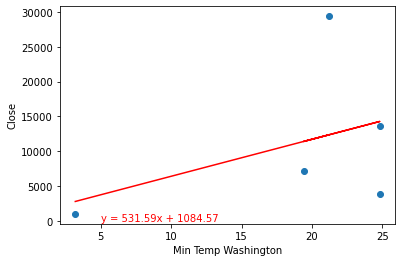

The correlation between both factors is 0.42


In [20]:
x_values = jan_data['Min Temp Washington']
y_values = jan_data['Close']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=10,color="red")
plt.xlabel('Min Temp Washington')
plt.ylabel('Close')

plt.show()

correlation = st.pearsonr(jan_data['Min Temp Washington'],jan_data['Close'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

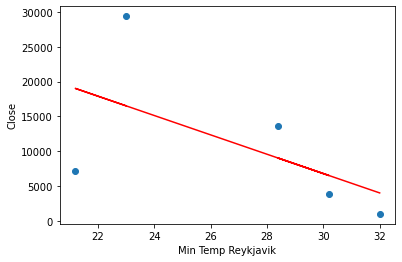

The correlation between both factors is -0.57


In [25]:
x_values = jan_data['Min Temp Reykjavik']
y_values = jan_data['Close']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=10,color="red")
plt.xlabel('Min Temp Reykjavik')
plt.ylabel('Close')

plt.show()

correlation = st.pearsonr(jan_data['Min Temp Reykjavik'],jan_data['Close'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [17]:
aug_data = bit_weather_df.loc[(bit_weather_df["Date"]== "08/01/17") | 
                              (bit_weather_df["Date"]== "08/01/18") | 
                              (bit_weather_df["Date"]== "08/01/19") | 
                              (bit_weather_df["Date"]== "08/01/20") | 
                              (bit_weather_df["Date"]== "08/01/21")]
aug_data

,Date,Max Temp Washington,Avg Temp Washington,Min Temp Washington,Max Temp Reykjavik,Avg Temp Reykjavik,Min Temp Reykjavik,Open,High,Low,Close,Adj Close,Volume
1,08/01/17,91.4,78.8,53.6,55.4,53.6,48.2,2871.300049,2921.350098,2685.610107,2718.260010,2718.260010,1.324670e+09
3,08/01/18,86.0,75.2,51.8,53.6,51.8,46.4,7769.040039,7769.040039,7504.950195,7624.910156,7624.910156,4.797620e+09
5,08/01/19,86.0,75.2,50.0,59.0,55.4,50.0,10077.442380,10446.919920,9922.019531,10399.668950,10399.668950,1.716534e+10
7,08/01/20,82.4,73.4,50.0,53.6,51.8,46.4,11322.570310,11794.775390,11239.682620,11759.592770,11759.592770,2.607567e+10
9,08/01/21,91.4,82.4,55.4,57.2,55.4,50.0,41460.843750,42541.679690,39540.941410,39974.894530,39974.894530,2.668844e+10


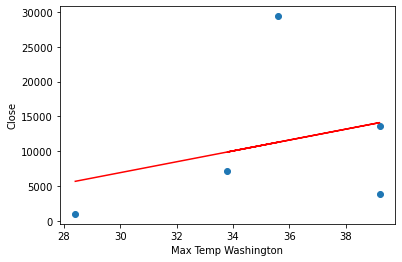

The correlation between both factors is 0.31


In [22]:
x_values = jan_data['Max Temp Washington']
y_values = jan_data['Close']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=10,color="red")
plt.xlabel('Max Temp Washington')
plt.ylabel('Close')

plt.show()

correlation = st.pearsonr(jan_data['Max Temp Washington'],jan_data['Close'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

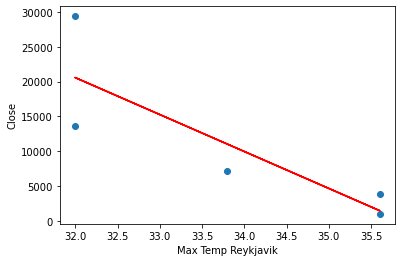

The correlation between both factors is -0.85


In [23]:
x_values = jan_data['Max Temp Reykjavik']
y_values = jan_data['Close']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=10,color="red")
plt.xlabel('Max Temp Reykjavik')
plt.ylabel('Close')

plt.show()

correlation = st.pearsonr(jan_data['Max Temp Reykjavik'],jan_data['Close'])
print(f"The correlation between both factors is {round(correlation[0],2)}")